FOOD DELIVERY TIME PREDICTION (MULTI LINEAR REGRESSION) (BY:P SWATHIKA)

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pickle

In [2]:
df = pd.read_csv("/content/drive/MyDrive/extra_need/Datas/Food_Delivery_Times.csv")

In [3]:
df = df.dropna()

In [4]:
features = ['Distance_km', 'Preparation_Time_min', 'Weather', 'Traffic_Level']
target = 'Delivery_Time_min'
X = df[features]
y = df[target]

In [5]:
categorical_cols = ['Weather', 'Traffic_Level']
encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    encoders[col] = le

/tmp/ipython-input-1193907857.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
/tmp/ipython-input-1193907857.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])


In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [8]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [9]:
with open("/content/drive/MyDrive/extra_need/h5_pkl/deliv_predict", "wb") as f:
    pickle.dump(model, f)
with open("/content/drive/MyDrive/extra_need/h5_pkl/deliv_scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)
with open("/content/drive/MyDrive/extra_need/h5_pkl/deliv_encoders.pkl", "wb") as f:
    pickle.dump(encoders, f)

In [10]:
with open("/content/drive/MyDrive/extra_need/h5_pkl/deliv_predict", "rb") as f:
    loaded_model = pickle.load(f)
with open("/content/drive/MyDrive/extra_need/h5_pkl/deliv_scaler.pkl", "rb") as f:
    loaded_scaler = pickle.load(f)
with open("/content/drive/MyDrive/extra_need/h5_pkl/deliv_encoders.pkl", "rb") as f:
    loaded_encoders = pickle.load(f)

In [11]:
def predict_delivery_time(distance, prep_time, weather, traffic):
    data = pd.DataFrame([[distance, prep_time, weather, traffic]], columns=features)
    for col in categorical_cols:
        le = loaded_encoders[col]
        data[col] = le.transform(data[col])
    data_scaled = loaded_scaler.transform(data)
    prediction = loaded_model.predict(data_scaled)
    return prediction[0]

In [12]:
distance = float(input("Enter distance (km): "))
prep_time = float(input("Enter preparation time (min): "))
weather = input("Enter weather(Windy,Clear,Foggy,Rainy,Snowy): ")
traffic = input("Enter traffic level(LOw,Medium,High): ")

Enter distance (km): 20
Enter preparation time (min): 30
Enter weather(Windy,Clear,Foggy,Rainy,Snowy): Snowy
Enter traffic level(LOw,Medium,High): Medium


In [13]:
delivery_time = predict_delivery_time(distance, prep_time, weather, traffic)
print(f"Predicted Delivery Time: {delivery_time:.2f} minutes")

Predicted Delivery Time: 99.09 minutes


In [14]:
import matplotlib.pyplot as plt
y_pred = loaded_model.predict(X_test)

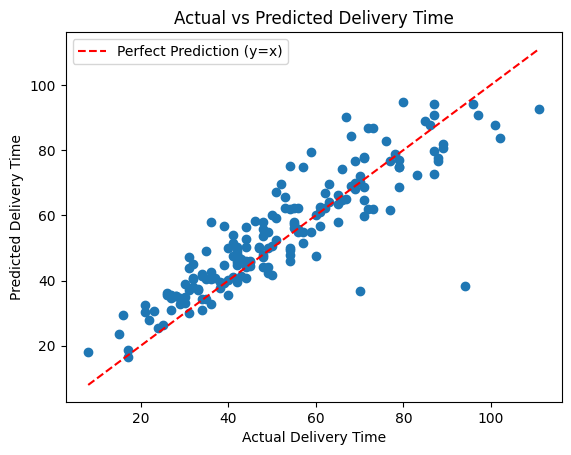

In [15]:
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction (y=x)')
plt.xlabel("Actual Delivery Time")
plt.ylabel("Predicted Delivery Time")
plt.title("Actual vs Predicted Delivery Time")
plt.legend()
plt.show()